# Computer Simulation in Physics
## Lecture 1

## Alpha Decay

![Alpha Decay](https://upload.wikimedia.org/wikipedia/commons/7/79/Alpha_Decay.svg)
 
Alpha decay or $\alpha$-decay is a type of radioactive decay in which an atomic nucleus emits an alpha particle (helium nucleus) and thereby transforms or 'decays' into an atom with a mass number that is reduced by four and an atomic number that is reduced by two. An alpha particle is identical to the nucleus of a helium-4 atom, which consists of two protons and two neutrons. 

For example, uranium-238 decays to form thorium-234:

$$\mathrm{~^{238}_{92}U}\rightarrow\mathrm{~^{234}_{90}Th} + \alpha $$

or

$$ \mathrm{~^{238}_{92}U}\rightarrow\mathrm{~^{234}_{90}Th} + \mathrm{~^{4}_{2}He}$$

Both mass number and atomic number are conserved: the mass number is 238 on the left side and (234 + 4) on the right side and the atomic number is 92 on the left side and (90 + 2) on the right side. Alpha particles have a charge +2, but as a nuclear equation describes a nuclear reaction without considering the electrons - a convention that does not imply that the nuclei necessarily occur in neutral atoms - the charge is not usually shown.

Alpha particles have a typical kinetic energy of 5 MeV (or $\approx$ 0.13% of their total energy, 110 TJ/kg) and have a speed of about 15,000,000 m/s, or 5% of the speed of light. Because of their relatively large mass, +2 electric charge and relatively low velocity, alpha particles are very likely to interact with other atoms and lose their energy, and their forward motion can be stopped by a few centimeters of air.

Approximately 99% of the helium produced on Earth is the result of the alpha decay of underground deposits of minerals containing uranium or thorium. The helium is brought to the surface as a byproduct of natural gas production.

_Source_: **Wikipedia** https://en.wikipedia.org/wiki/Alpha_decay

### One-decay process

Consider the case of a nuclide $\mathrm{A}$ that decays into another $\mathrm{A}$ by some process 

$$\mathrm{A} \rightarrow \mathrm{B}.$$ 

The decay of an unstable nucleus is entirely random and it is impossible to predict when a particular atom will decay. However, it is equally likely to decay at any instant in time. Therefore, given a sample of a particular radioisotope, the number of decay events -dN expected to occur in a small interval of time dt is proportional to the number of atoms present N, that is

 $$\frac{\mathrm{d}N}{\mathrm{d}t} \propto N.$$

 
Particular radionuclides decay at different rates, so each has its own decay constant $k$. The expected decay -dN/N is proportional to an increment of time, dt,

 $$\frac{\mathrm{d}N}{N} = - k \; \mathrm{d}t.$$
 
 
_Source_: **Wikipedia** https://en.wikipedia.org/wiki/Radioactive_decay


This is often written in the form of a differential equation,

 $$\frac{\mathrm{d}N}{\mathrm{d}t} = - k \; N.$$
 

The negative sign indicates that N decreases as time increases, as the decay events follow one after another. 

## Numerical solution

We can numerically model the spontaneous radioactive decay of $\mathrm{~^{238}_{92}U}$ by considering a one-decay process.

Start by assuming there is initial number of U-238 atoms. Let's say we start with 1000 moles of atoms.

In [1]:
N_initial = 1000

*To execute a cell in Jupyter use "shift-Return"*

We've just assigned the value 1000 to a variable called `N_initial`. In Python, we can display the value of a variable using the `print` function.

In [2]:
print(N_initial)

1000


#### Discretization

Our goal is to determine the number of atoms, N, as it changes over time, t.

Instead of a continuous function, N(t), in numerical methods we will look for value of N only at specific values of t:

$$N_i = N(t_i)$$

This process is called **discretization**. We imagine time being as broken up into a sequence of discrete points.  

$$ t_0,\; t_1,\; t_2,\; \ldots,\;, t_{i-1}\;, t_{i},\; t_{i+1},\ldots$$

For example, the interval 0 to 4 could be discretized into the sequence

$$ [t_0,\; t_1,\; t_2,\; t_3,\; t_4,\; t_5,\; t_6,\; t_7,\; t_8,\; t_9, \; t_{10}] = $$
$$[0.0,\; 0.4,\; 0.8,\; 1.2,\; 1.6,\; 2.0,\; 2.4,\; 2.8,\; 3.2,\; 3.6,\; 4.0]$$

The length of the interval between the discrete points in time is called the **time step**. In this example,

$$ \Delta t = t_i - t_{i-1} = 0.4$$

In more advanced numerical methods, the time step does not necessarily have to always be a constant. In PHYS2820, we will generally work with equal sized time steps.

Let's use a variable to hold the value of the time step for our U-238 decay problem.  The decay is really slow so we to consider really long times. A reasonable time step might be a hundred million years:

In [3]:
dt = 100.0e6

The notation 100.0e6 is scientific notation for 100,000,000. Again, we can use the `print` function to display the value of a variable:

In [4]:
print(dt)

100000000.0


## NumPy

We want to consider a sequences of values. In Python, one method of representing this is to use arrays.  Arrays and mathematical functionality is included in the NumPy module (as in, *Num*erical *Py*thon) which is called numpy. In Python we have to import these modules before we can use them

In [5]:
import numpy

There are several ways of creating arrays with numpy.  Two of the most common are:

 - `numpy.arange(start, stop, step)`
 - `numpy.zeros(size)`
 

For the first method, `numpy.arange()`, will create an array with regularly incrementing values. For example, if we want to start at 0 and go up until 4 by steps of 0.4 we write:

In [6]:
A = numpy.arange(0, 4, 0.4)
print(A)

[0.  0.4 0.8 1.2 1.6 2.  2.4 2.8 3.2 3.6]


Note that the second argument, called the stop, is the upper bound on the sequence but not actually part of the sequence itself.

We now create an array of times $t_i$ starting at 0 and up to, say, a maximum of 10 billion years with a step size dt:

In [7]:
tmax = 10.0e9
t = numpy.arange(0, tmax, dt)
print(t)    

[0.0e+00 1.0e+08 2.0e+08 3.0e+08 4.0e+08 5.0e+08 6.0e+08 7.0e+08 8.0e+08
 9.0e+08 1.0e+09 1.1e+09 1.2e+09 1.3e+09 1.4e+09 1.5e+09 1.6e+09 1.7e+09
 1.8e+09 1.9e+09 2.0e+09 2.1e+09 2.2e+09 2.3e+09 2.4e+09 2.5e+09 2.6e+09
 2.7e+09 2.8e+09 2.9e+09 3.0e+09 3.1e+09 3.2e+09 3.3e+09 3.4e+09 3.5e+09
 3.6e+09 3.7e+09 3.8e+09 3.9e+09 4.0e+09 4.1e+09 4.2e+09 4.3e+09 4.4e+09
 4.5e+09 4.6e+09 4.7e+09 4.8e+09 4.9e+09 5.0e+09 5.1e+09 5.2e+09 5.3e+09
 5.4e+09 5.5e+09 5.6e+09 5.7e+09 5.8e+09 5.9e+09 6.0e+09 6.1e+09 6.2e+09
 6.3e+09 6.4e+09 6.5e+09 6.6e+09 6.7e+09 6.8e+09 6.9e+09 7.0e+09 7.1e+09
 7.2e+09 7.3e+09 7.4e+09 7.5e+09 7.6e+09 7.7e+09 7.8e+09 7.9e+09 8.0e+09
 8.1e+09 8.2e+09 8.3e+09 8.4e+09 8.5e+09 8.6e+09 8.7e+09 8.8e+09 8.9e+09
 9.0e+09 9.1e+09 9.2e+09 9.3e+09 9.4e+09 9.5e+09 9.6e+09 9.7e+09 9.8e+09
 9.9e+09]


To count the number of elements in this array, we can use the `len` function to get the length.

In most situations, we normally would use the name N instead of the name M to store the size of the array. But in this problem we are using the letter N to represent the number of U-238 atoms so best not to confuse things too much. 

In [8]:
M = len(t)
print(M)

100


We now can create an array to store the number of U-238 atoms at each point in time.  We use the second method of array creating and initialize an array of all zeros the same size as the time array.

In [9]:
N = numpy.zeros(M)
print(N)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


Python is a 0-based language. That is, if we want to list first five (5) elements of an array we would write

    N[0], N[1], N[2], N[3], N[4]
    
This also means that the last element in an array of length 
M is actually given by

    N[M-1]
    
This is the reason that `numpy.arange` function as the 
behaviour it does regarding the last value. As an example, consider a sequence of 10 numbers starting with 0 with a step size of 1

In [10]:
A = numpy.arange(0, 10, 1)
print(A)

[0 1 2 3 4 5 6 7 8 9]


Now back to radioactive decay.  We already know the initial number of U-238 atoms, so we can assign that value to the first element of the array N:

In [11]:
N[0] = N_initial
print(N)

[1000.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.]


## Numerical Method

We start with the differential equation that represents a one-decay process

$$\frac{\mathrm{d}N}{\mathrm{d}t} = -k \; N$$

to approximate how N will change in time. Assuming we are dealing with small time intervals, $\Delta t$, the change in the number of atoms $\Delta N$ is

$$ \Delta N = - k \; N \Delta t $$

In terms of our sequence notation, that means

$$ N_{i} - N_{i-1} = - k \; N_{i-1} (t_{i} - t_{i-1} )$$

Since our time step is constant we can write this in code as
```python
N[i] = N_i - k * N[i-1] * dt
```
This rule, or algorithm, tells us how to calculate the number atoms at time $t_{i}$ given the number of atoms at time $t_{i-1}$. The algorithm works because we assume we already know the value of $N_0$ at time $t_0$.

We can look up the decay constant for
the spontaneous radioactive decay of $\mathrm{~^{238}_{92}U}$:
$$k  = 4.916 \times 10^{-18}\; \mathrm{s}^{-1} $$ [](WolframAlpha)

We need a variable to store the decay constant value.  While we are given the decay constants in units of per seconds, we are measuring time in years so we need to convert the units from 'per second' to 'per year'.

In [12]:
k_in_per_sec = 4.916e-18
k = k_in_per_sec * 60 * 60 * 24 * 365
print(k)

1.55030976e-10


To determine values of $N_i$ for all elements in the array, we can use a `for` loop.   The `range` function is really similar to the numpy.arange function so the index variable i will take on the succesive values start at 1 up to, but not including, M.

In [13]:
for i in range(1, M):
    N[i] = N[i-1] - k * N[i-1] * dt

In [14]:
print(N)

[1000.          984.4969024   969.23415084  954.2080192   939.41483915
  924.85099921  910.5129439   896.39717287  882.50024001  868.81875265
  855.34937073  842.08880596  829.03382101  816.18122877  803.52789152
  791.07072019  778.80667361  766.73275774  754.84602496  743.14357336
  731.62254602  720.28013028  709.11355712  698.12010043  687.29707638
  676.64184272  666.1517982   655.82438185  645.65707245  635.64738784
  625.79288435  616.09115619  606.53983486  597.1365886   587.87912179
  578.76517439  569.7925214   560.95897233  552.26237063  543.7005932
  535.27154984  526.97318276  518.80346607  510.7604053   502.84203689
  495.04642772  487.37167463  479.81590399  472.3772712   465.05396026
  457.84418333  450.74618027  443.75821824  436.87859127  430.10561983
  423.43765043  416.87305521  410.41023155  404.04760167  397.78361227
  391.6167341   385.54546165  379.56831273  373.68382813  367.89057127
  362.18712784  356.57210545  351.0441333   345.60186184  340.24396244
  334.9

So in over 10 billion years, our initial 1000 atoms of U-238 atoms should have decayed into approximately 213 atoms.  In a physical sample of U-238 there would be more like $1000 \times 10^{23}$ atoms but this does not change the fundamental pattern the exponential decay.

## Visualization
While we can look at the array N for the number of atoms of U-238 by using the print function, it would be much better to visualize the output of our model with a plot.

### Matplotlib
There are a number of plotting and graphics packages available.  In this course, we will use _Matplotlib_ for our plotting. This module can be imported with the command

In [15]:
import matplotlib.pyplot

and we can then make a plot and add axes labels with the functions like

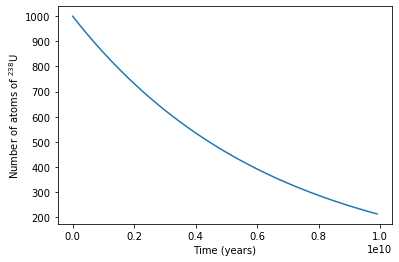

In [16]:
matplotlib.pyplot.plot(t, N)
matplotlib.pyplot.xlabel('Time (years)')
matplotlib.pyplot.ylabel('Number of atoms of $^{238}$U')

matplotlib.pyplot.show()

Typing `matplotlib.pyplot` for every plotting function would quickly become labourious.  We can import this module
with the shortened name of `plt`.

In [17]:
import matplotlib.pyplot as plt

Now the same plot is more compactly created with

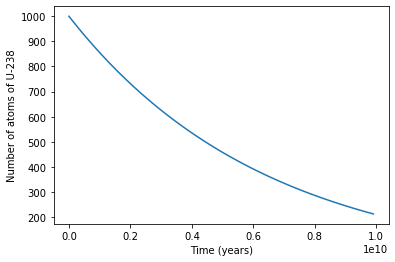

In [18]:
plt.plot(t, N)
plt.xlabel('Time (years)')
plt.ylabel('Number of atoms of U-238')
plt.show()

There is also a standard short form for the name of NumPy module, `np`, that we will use from now on.

In [19]:
import numpy as np

## Exact symbolic solution

If you have already taken a mathematics course in ordinary differential equations (ODEs), you may recall the solution to this first-order differential equation 

 $$\frac{\mathrm{d}N}{\mathrm{d}t} = - k \; N.$$
 
is the function:

 $$ N(t) = N_0\,e^{-kt}, \,\! $$ 
 
where $N_0$ is the value of $N$ at time $t$ = 0.

In an ODEs course, we learn the rules needs to solve this kind of differential equation.  

These rules have been codified in computer algebra systems such as SymPy (*Sym*bolic *Py*thon). SymPy can solve this differential equation for us even if we hadn't yet taken the required course.

In [20]:
from sympy import Symbol, Function, Eq, dsolve

In [21]:
t_ = Symbol('t')
k_ = Symbol('k')
N0 = Symbol('N_0')
N_ = Function('N')
dsolve(Eq(N_(t_).diff(t_), - k_* N_(t_)), 
       ics = {N_(0) : N0})

Eq(N(t), N_0*exp(-k*t))

We will revisit SymPy later on in Phys 2820.

## Comparison with the exact solution

Finally, we may want to compare our numerical solution to the analytical solution given at the beginning. 

In [22]:
N_analytical = N_initial * np.exp(-k * t)

We have used the NumPy function `np.exp` to evaluate an array point-wise. So N_analytical is an array the same size as t and N.

To compare the numerical and analytical solutions we can plot them together with a legend and different colours.

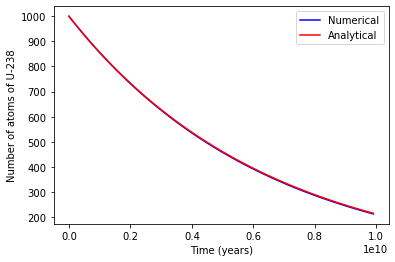

In [23]:
plt.plot(t, N, 'b-', label = 'Numerical')
plt.plot(t, N_analytical, 'r-', label = 'Analytical')
plt.xlabel('Time (years)')
plt.ylabel('Number of atoms of U-238')
plt.legend()
plt.show()

As you can see the numerical solutions matches very closely to the analytical solution.

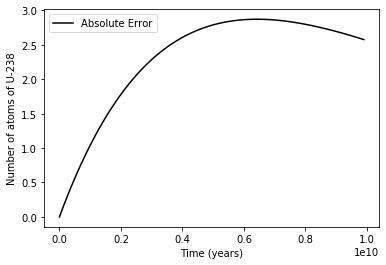

In [24]:
N_difference = abs(N - N_analytical)
plt.plot(t, N_difference, 'k-', label = 'Absolute Error')
plt.xlabel('Time (years)')
plt.ylabel('Number of atoms of U-238')
plt.legend()
plt.show()


## Conclusion

We have just solved our first numerical model!

For comparison, here is the entire analysis written as a single Python program. 

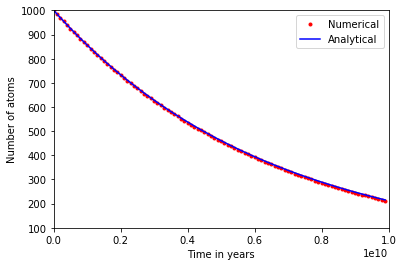

In [25]:
# 1D radioactive decay

import numpy as np
import matplotlib.pyplot as plt

# initial number of uranium atoms
N_uranium_initial = 1000

# decay constant of 238 U (expressed as 'per year')
k = 4.916e-18*365*24*60*60

# simultion to maximum number of years
tmax = 10.0e9

# time step in years
dt = 100e6

# calculate an array for all times
t = np.arange(0, tmax, dt)

# determine total number of timesteps needed
M = len(t)

# initializes N_uranium, a vector of dimension M to being all zeros
N_uranium = np.zeros(M)

# the initial condition, first entry in the vector N_uranium is N_uranium_initial
N_uranium[0] = N_uranium_initial

# loop over the timesteps and calculate the numerical solution
for i in range(1, M):
    N_uranium[i] = N_uranium[i-1] - (k * N_uranium[i-1])*dt

# For comparison, evaluate the analytical solution
N_analytical = N_uranium_initial * np.exp(-k * t)

# Plot the numerical solution in red dots
plt.plot(t, N_uranium, 'r.', label = 'Numerical'); 
# Plot the numerical solution with blue line
plt.plot(t, N_analytical, 'b-', label = 'Analytical'); 
# label axes
plt.xlabel('Time in years')
plt.ylabel('Number of atoms')

# axes scales
plt.xlim(0, tmax)
plt.ylim(100, 1000)
plt.legend()

# save the plot as an image
# plt.savefig('decay.png')

plt.show()

If you copy this program into a file called `decay.py` and uncomment the line that says `plt.savefig('decay.png')` then the program can be run in the terminal with

```python decay.py```

and it will produce a new image file `decay.png`.

- - - 
## Textbook readings

Read the following sections from [CSM Chapter 1](https://www.compadre.org/osp/document/ServeFile.cfm?ID=7375&DocID=2144&DocFID=3570&Attachment=1)
- 1.1 Importance of computers in physics
- 1.2 The importances of computer simulation